# Solow model with endogenous Technological Progress

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

# Analysis of the Solow Model with Human Capital

The Solow model is a foundational economic model that elucidates long-term economic growth dynamics. This project extends the classical Solow model by incorporating human capital, thereby enhancing our understanding of how human capital investments can drive technological progress and influence overall economic growth.

## Purpose

The Solow model with human capital integration aims to dissect the multifaceted relationship between capital accumulation, labor force growth, and advancements in technology. By including human capital, we extend the model's capacity to simulate more realistic scenarios where education and skill development play crucial roles.

## Model Equations

The extended Solow model is described by the following equations, incorporating both physical and human capital:

$$
Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}, \quad 0 < \alpha, \phi < 1
$$

where:
- \(Y_t\) is the total output at time \(t\),
- \(K_t\) represents physical capital,
- \(H_t\) denotes human capital,
- \(A_t\) is the level of technology,
- \(L_t\) is the labor force,
- \(\alpha\) and \(\phi\) are the output elasticities of physical and human capital, respectively.

### Growth Dynamics

Labor and technology evolve as follows:
$$
L_{t+1} = (1 + n) L_t, \quad L_0 \text{ given}
$$
$$
A_{t+1} = (1 + g) A_t, \quad A_0 \text{ given}
$$

In our extension, technology progresses endogenously influenced by human capital:
$$
A_{t+1} = \omega H_t, \quad A_0 \text{ given}
$$

### Capital Accumulations

The accumulation equations for physical and human capital are:
$$
K_{t+1} = s_K Y_t + (1 - \delta) K_t, \quad K_0 \text{ given}
$$
$$
H_{t+1} = s_H Y_t + (1 - \delta) H_t, \quad H_0 \text{ given}
$$

### Transition Equations Using Tilde Variables

Utilizing tilde variables, which represent per effective worker values (\(\tilde{X} = \frac{X_t}{A_t L_t}\)), we transform the accumulation equations:

$$
\tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1 - \delta) \tilde{k}_t}{1 + n}
$$
$$
\tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1 - \delta) \tilde{h}_t}{1 + n}
$$

These tilde variables help analyze the model's behavior in a normalized manner, facilitating the understanding of growth trajectories and steady state conditions.

## Steady State Analysis

We derive the steady state values by setting the change in tilde variables across periods to zero, leading to a system of equations:
$$
0 = \frac{s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1 - \delta) \tilde{k}_t}{1 + n} - \tilde{k}_t
$$
$$
0 = \frac{s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi + (1 - \delta) \tilde{h}_t}{1 + n} - \tilde{h}_t
$$

Solving these equations provides insights into the model's long-term equilibrium states under different parameter settings and growth mechanisms.

## Model Simulation and Results

In the Jupyter Notebook, we initialize the model with specified parameters, simulate its progression, and visualize the trajectories of \(\tilde{K}_t\) and \(\tilde{H}_t\) towards their steady states. This visualization underscores the impact of human capital on economic outcomes, particularly when technology growth is linked to human capital development.


## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

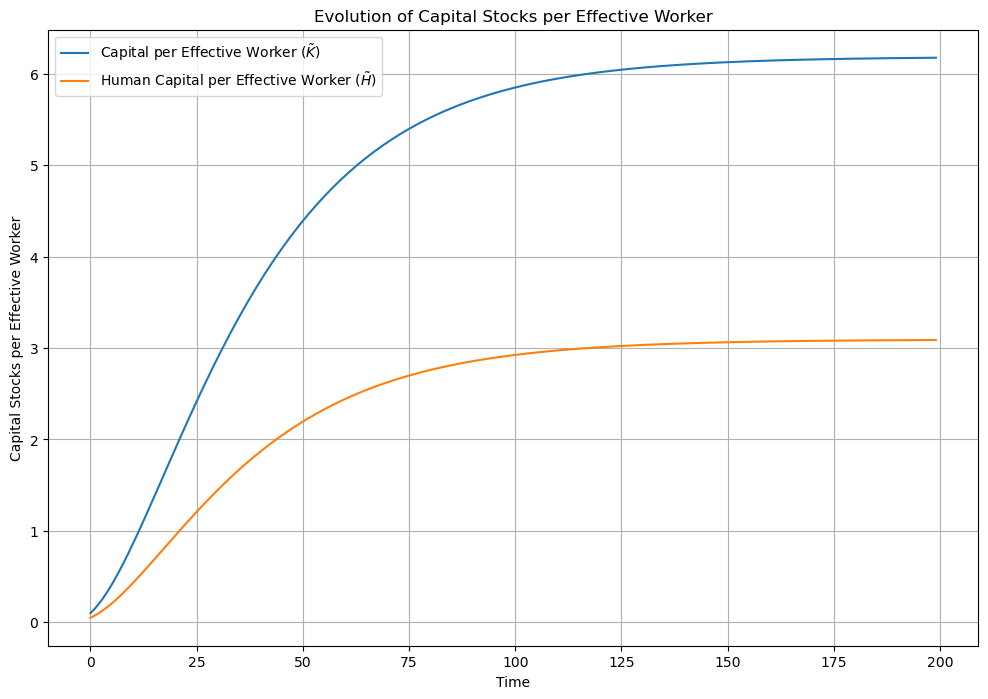

Base Model Steady State (Exogenous Growth):
K_tilde: 6.1758, H_tilde: 3.0879


In [48]:
# Import the model
from modelproject import SolowModelHumanCapital
# Initialize and simulate the base model with exogenous growth
base_model = SolowModelHumanCapital(endogenous=False)
base_model.plot_tilde_variables()

# Print the steady state values for the base model
print("Base Model Steady State (Exogenous Growth):")
print(f"K_tilde: {base_model.K_tilde[-1]:.4f}, H_tilde: {base_model.H_tilde[-1]:.4f}")



## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

We now make a plot that shows how the model changes with parameter values

In [49]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display
from modelproject import SolowModelHumanCapital

# Initialize the model
model = SolowModelHumanCapital()

# Define a function to update the plot based on the slider
def update_model(alpha, phi, g, n, s_K, s_H, delta):
    model.update_params(alpha=alpha, phi=phi, g=g, n=n, s_K=s_K, s_H=s_H, delta=delta)
    model.plot_tilde_variables()

# Create sliders for parameters
alpha_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.9, step=0.05, description='Alpha')
phi_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.9, step=0.05, description='Phi')
g_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='g')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='n')
s_K_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.05, description='s_K')
s_H_slider = widgets.FloatSlider(value=0.1, min=0.05, max=0.5, step=0.05, description='s_H')
delta_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Delta')

# Display sliders and bind the update function
ui = widgets.VBox([alpha_slider, phi_slider, g_slider, n_slider, s_K_slider, s_H_slider, delta_slider])
out = widgets.interactive_output(update_model, {'alpha': alpha_slider, 'phi': phi_slider, 'g': g_slider, 'n': n_slider, 's_K': s_K_slider, 's_H': s_H_slider, 'delta': delta_slider})
display(ui, out)

Output()

We now implement the extension where technological growth is endogenous

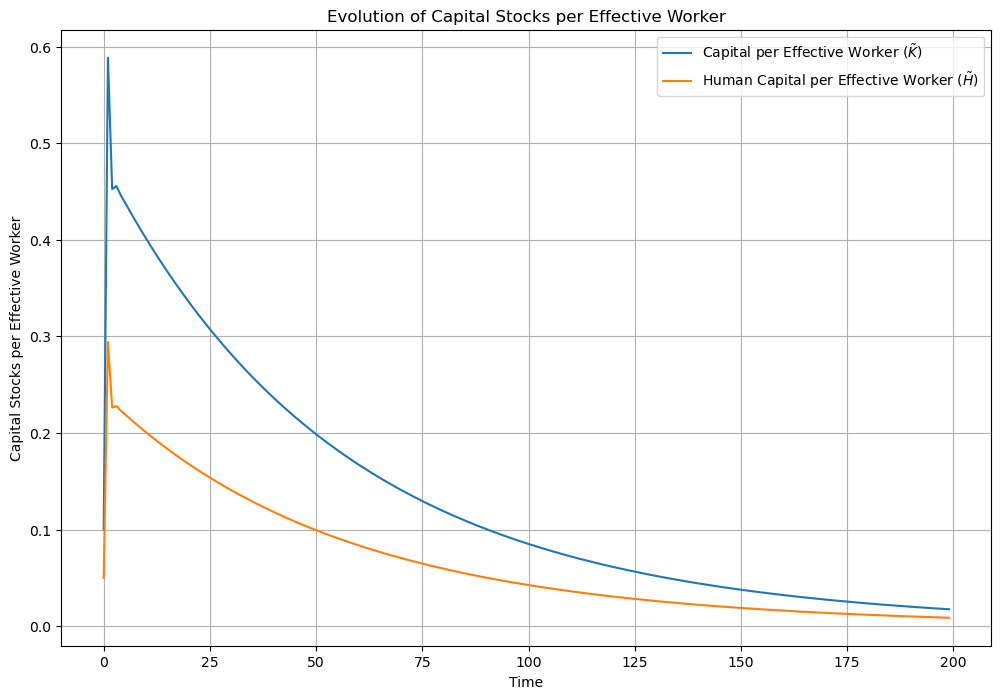

Extension Model Steady State (Endogenous Growth):
K_tilde: 0.0175, H_tilde: 0.0088


In [50]:
# Import the updated model
from modelproject import SolowModelHumanCapital

# Initialize and simulate the extension model with endogenous growth
extension_model = SolowModelHumanCapital(endogenous=True)
extension_model.plot_tilde_variables()

# Print the steady state values for the extension model
print("Extension Model Steady State (Endogenous Growth):")
print(f"K_tilde: {extension_model.K_tilde[-1]:.4f}, H_tilde: {extension_model.H_tilde[-1]:.4f}")


# Conclusion

By the solution of the base model and the extension we can see that, when the growth of technology happens through human capital, the SS values of effective worker variables (tilde variables) increases. 